In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import scipy as sp
from scipy import io
from sklearn import svm
from multiprocessing import Process

In [2]:
# loading matlab file
# returns dictionary with variable names as keys and matrix as values
mnist_dict = io.loadmat('mnist/train.mat')

In [3]:
# ***********************PROBLEM 1 --> VALIDATION SETS***********************

# -----------MNIST SET--------

# print(mnist_dict.keys())

# only need trainX, the matrix data
# notice that other keys have __name__ convention; means private variables (python thing)
# print('matrix tied to trainX key:')
# print(mnist_train['trainX'])

# get the matrix
mnist_trainX = mnist_dict['trainX']

# gives the dimensions of the nd array, these are ndarrays (scipy)
# (n, d) = (number of row vectors, dimension of each vector), e.g. (2,3) 2 x 3 matrix
# print('\n shape of mnist_train:')
# print(mnist_trainX.shape)


# Last column is the label (28 x 28 matrix so 784 columns of data, the 785th is the label)
# print(trainX[0, -1]) 


#shuffle matrix
np.random.shuffle(mnist_trainX)
num_points_mnist = mnist_trainX.shape[0] #60,000 rows = points
mnist_valid_set = mnist_trainX[:10000, :-1] #select first 10,000 rows, all the columns except last one
mnist_valid_y = mnist_trainX[:10000, -1] #get last column of first 10000 points --> the label for valid set
mnist_train_set = mnist_trainX[10000:, :-1] #the rest (50000 points) is for training
mnist_train_y = mnist_trainX[10000:, -1]  #get last column of last 50000 points --> label for training set

In [17]:
# ---------------CIFAR-10 SET----------------
cifar_dict = sp.io.loadmat('cifar/train.mat')
# print('cifar_dict keys') 
# print(cifar_dict.keys())

cifar_trainX = cifar_dict['trainX']

# print('cifar_dict dimension') 
# print(cifar_trainX.shape)

np.random.shuffle(cifar_trainX)
cifar_valid_set = cifar_trainX[:5000, :-1] 
cifar_valid_y = cifar_trainX[:5000, -1] 
cifar_train_set = cifar_trainX[5000:, :-1] 
cifar_train_y = cifar_trainX[5000:, -1]
print(cifar_valid_y.shape)
print(cifar_valid_set.shape)
print(cifar_train_y.shape)
print(cifar_train_set.shape)

labels = np.unique(cifar_valid_y)
print(labels)

(5000,)
(5000, 3072)
(45000,)
(45000, 3072)
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# --------------SPAM DataSet----------------
spam_dict = sp.io.loadmat('spam/spam_data.mat')
# print('spam keys') 
# print(spam_dict.keys())

spam_trainX = spam_dict['training_data']

# print('dimension of spam data')
# print(spam_trainX.shape)

np.random.shuffle(spam_trainX)
spam_valid_set = spam_trainX[:1034, :-1] 
spam_valid_y = spam_trainX[:1034, -1] 
spam_train_set = spam_trainX[1034:, :-1] 
spam_train_y = spam_trainX[1034:, -1]

In [ ]:
# *********************PROBLEM 2 --> TRAIN DATA ***********************


error = list() # need error to be an array in order to plot it (See matplotlib.pyplot)


# calculate_error takes in two arrays of labels: the real labels y and
# the labels predicted by the svm y_hat. It returns the error_rate
def calculate_error(y, y_hat):
    # y = true values, y_hat = predicted y-values
    error = 0
    size = y.shape[0] # num_samples
    for s in range(size):
        if y[s] != y_hat[s]:
            error += 1
    print('Error rate is ')
    print(error/size)
    print('\n')
    print('Accuracy is ')
    print(1 - error/size)
    return error/size


def plot_error(data, labels, name):
    plt.plot(data, labels)
    plt.xlabel('num_samples')
    plt.ylabel('error_rate')
    plt.title(name + '_Linear_SVM')
    plt.show()


# returns plot of error rate
def train_svm(samples, clf, train_set, train_y, valid_set, valid_y, name):
    print('Training ' + name + '\n')
    for sample_size in samples:
        # fit the training data to the labels
        print('Train_data shape, train_label shape:')
        print(train_set.shape, train_y.shape)
        clf.fit(train_set[:sample_size], train_y[:sample_size])
        y_hat = clf.predict(valid_set)
        error.append(calculate_error(valid_y, y_hat))
    plot_error(samples, error, name)

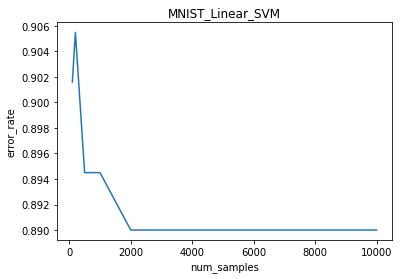

In [ ]:
# ----------TRAIN MNIST DATA------------#
from sklearn.svm import SVC
clf_mnist = SVC()
experiments = [100, 200, 500, 1000, 2000, 5000, 10000]
train_svm(experiments, clf_mnist, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y, 'MNIST')

Training CIFAR



Error rate is 
0.7726


Accuracy is 
0.22740000000000005




Error rate is 
0.7394


Accuracy is 
0.26060000000000005




Error rate is 
0.7164


Accuracy is 
0.28359999999999996




Error rate is 
0.7162


Accuracy is 
0.28380000000000005




Error rate is 
0.7092


Accuracy is 
0.29079999999999995




Error rate is 
0.7006


Accuracy is 
0.2994




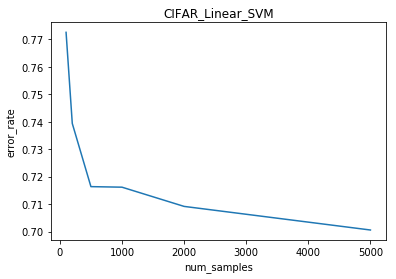

In [29]:
# -----------TRAIN CIFAR DATA-----------#
clf_cifar = SVC(kernel='linear')
experiments = [100, 200, 500, 1000, 2000, 5000]
# # expect between 25-35% accuracy
train_svm(experiments, clf_cifar, cifar_train_set, cifar_train_y, cifar_valid_set, cifar_valid_y, 'CIFAR')

Training SPAM

Error rate is 
0.14313346228239845


Accuracy is 
0.8568665377176016


Error rate is 
0.14313346228239845


Accuracy is 
0.8568665377176016




Error rate is 
0.14313346228239845


Accuracy is 
0.8568665377176016


Error rate is 
0.14313346228239845


Accuracy is 
0.8568665377176016




Error rate is 
0.14119922630560927


Accuracy is 
0.8588007736943908




Error rate is 
0.1402321083172147


Accuracy is 
0.8597678916827853




ValueError: x and y must have same first dimension, but have shapes (6,) and (12,)

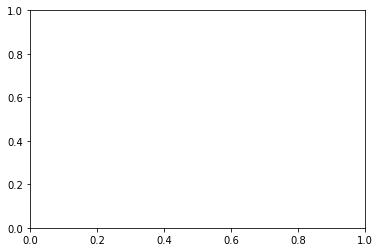

In [29]:
# ----------TRAIN SPAM DATA -------------
clf_spam = SVC()
experiments = [100, 200, 500, 1000, 2000, 4137]
train_svm(experiments, clf_spam, spam_train_set, spam_train_y, spam_valid_set, spam_valid_y, 'SPAM')

In [35]:
# ************************** PROBLEM 3: BEST C Value ********************************
from sklearn.svm import SVC
C_range = np.logspace(-10, -2, 10, 50, 100)
experiments = [10000]
for C in C_range:
    clf_mnist = SVC(C=C)
    train_svm(experiments, clf_mnist, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y, 'MNIST')

Training MNIST

Train_data shape, train_label shape:
(50000, 784) (50000,)


In [ ]:
# ***************************** PROBLEM 4 K-FOLD CROSS VALIDATION *******************

In [ ]:
# ****************** PROBLEM 5: KAGGLE COMPETITION ***************
# from sklearn import svm
# #create four classifers
# #in the constructor for the svc you need to make sure it's a binary classifier
# clf1 = svm.SVC()
# clf2 = svm.SVC()
# clf3 = svm.SVC()
# clf4 = svm.SVC()
# 
# #add extra models to increase the hamming distance, get more room for errors
# 
# #fit the data X to the labels yi where yi = {0,1}
# #binary classifer
# #this comes after you build y1, y2, y3, y4
# clf1.fit(X, y1)
# clf2.fit(X, y2)
# clf3.fit(X, y3)
# clf4.fit(X, y4)
# 
# 
# 
#